# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [12]:
def apply_svd_custom(X_train, X_test, n_components):
    # Perform SVD on the training data
    U_train, S_train, Vt_train = np.linalg.svd(X_train, full_matrices=False)
    U_test, S_test, Vt_test = np.linalg.svd(X_test, full_matrices=False)
    
    # Keep only the top 'n_components' singular values
    S_train_reduced = np.diag(S_train[:n_components])
    S_test_reduced = np.diag(S_test[:n_components])
    
    # Transform training and test data using reduced singular values
    X_train_svd = np.dot(U_train[:, :n_components], S_train_reduced)
    X_test_svd = np.dot(U_test[:, :n_components], S_test_reduced)
    
    return X_train_svd, X_test_svd, Vt_train

## Part 3: Train Logistic Regression and Measure Performance

In [13]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')
    
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [15]:
# Define the list of components to test
svd_components = [10, 50, 100, 200, 300, 400]  # Feel free to adjust this list

# Store the results
results = []

for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")
    
    # Apply SVD to training and test data, and get the singular vectors
    X_train_svd, X_test_svd, Vt_train = apply_svd_custom(X_train, X_test, n_components)
    
    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)
    
    # Append the result
    results.append({
        'n_components': n_components,
        'accuracy': accuracy,
        'training_time': training_time
    })
    
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")


Applying custom SVD with 10 components...


C:\Users\Xander\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 10, Accuracy: 0.4141, Training time: 0.4685 seconds
Applying custom SVD with 50 components...


C:\Users\Xander\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 50, Accuracy: 0.3327, Training time: 6.4758 seconds
Applying custom SVD with 100 components...


C:\Users\Xander\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 100, Accuracy: 0.3462, Training time: 24.1949 seconds
Applying custom SVD with 200 components...


C:\Users\Xander\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 200, Accuracy: 0.3219, Training time: 63.7345 seconds
Applying custom SVD with 300 components...


C:\Users\Xander\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 300, Accuracy: 0.3216, Training time: 105.0773 seconds
Applying custom SVD with 400 components...


C:\Users\Xander\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 400, Accuracy: 0.3185, Training time: 186.5797 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


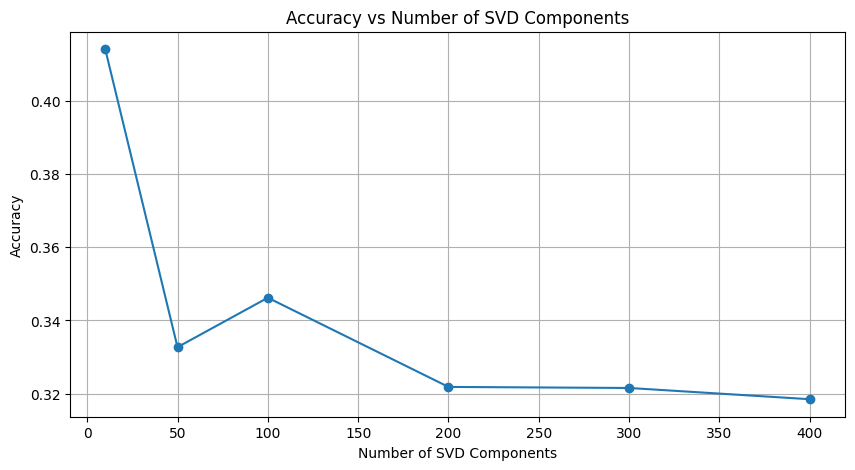

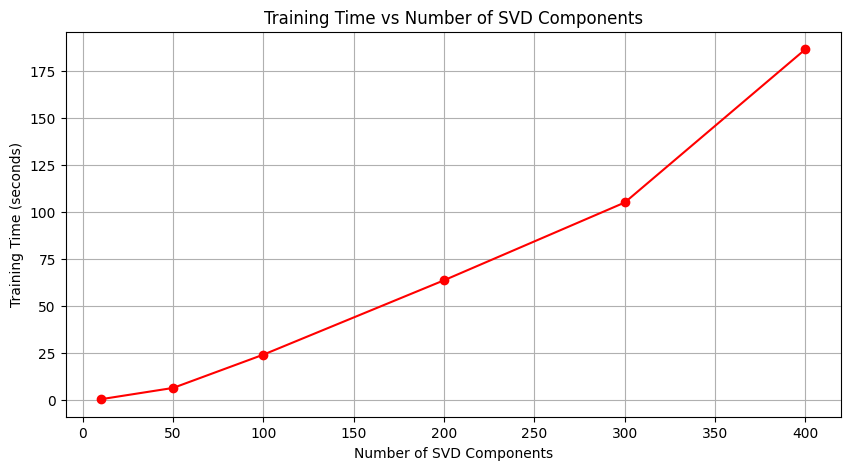

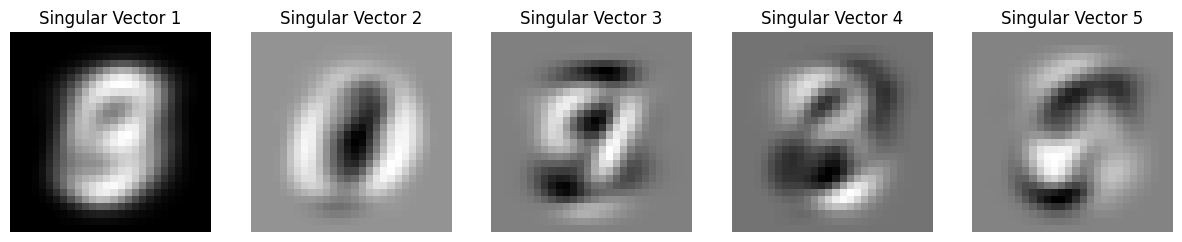

In [16]:
## Your implementation here...
## You may add necessary lines in Part 4 to access data for visualization
# Extract values for plotting
n_components = [r['n_components'] for r in results]
accuracies = [r['accuracy'] for r in results]
training_times = [r['training_time'] for r in results]

# Plot Accuracy vs Number of Components
plt.figure(figsize=(10, 5))
plt.plot(n_components, accuracies, marker='o')
plt.title('Accuracy vs Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Plot Training Time vs Number of Components
plt.figure(figsize=(10, 5))
plt.plot(n_components, training_times, marker='o', color='r')
plt.title('Training Time vs Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Training Time (seconds)')
plt.grid(True)
plt.show()

# Apply SVD to get the top singular vectors
X_train_svd, X_test_svd, Vt_train = apply_svd_custom(X_train, X_test, n_components=784)

# Get the top 5 singular vectors from Vt_train
top_5_singular_vectors = Vt_train[:5]  # Vt_train is the matrix from the SVD

# Reshape each singular vector to 28x28 and plot
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, ax in enumerate(axes):
    # Reshape the singular vector into a 28x28 image
    singular_image = top_5_singular_vectors[i].reshape(28, 28)
    
    # Plot the image
    ax.imshow(singular_image, cmap='gray')
    ax.set_title(f"Singular Vector {i+1}")
    ax.axis('off')

plt.show()

## Part 6: Analyze / Conclusion 

YOUR ANSWER: 
### Accuracy vs. Number of SVD Components:
From the plot showing the relationship between accuracy and the number of SVD components, we observe that:

- **Sharp decrease after 10 components**: Initially, the accuracy is relatively high for 10 components, likely because these first few components capture broad, distinguishing features of the MNIST digits.
- **Stabilization beyond 100 components**: Beyond 100 components, the accuracy remains relatively stable, hovering around 0.32. This suggests that the additional components beyond 100 are not contributing significant new information to improve classification accuracy.
- **No substantial improvement after 100 components**: The accuracy does not improve much after reaching 100 components, which indicates diminishing returns. This implies that most useful information is captured by the first 100 components.

### Training Time vs. Number of SVD Components:
The plot of training time vs. the number of components demonstrates:

- **Linear growth**: The training time increases nearly linearly as the number of SVD components increases. This is expected since higher-dimensional data requires more computations.
- **Training time becomes substantial after 200 components**: While the increase in training time starts small, it becomes significant after 200 components, suggesting that adding more components increases the computational burden without substantial accuracy improvements.

### Singular Vectors Visualization:
The top 5 singular vectors show general patterns resembling the shapes of MNIST digits:

- **First singular vector**: Captures broad strokes that resemble the digit "9", which highlights that this singular vector captures key features across the dataset.
- **Subsequent singular vectors**: Vectors 2, 3, 4, and 5 each capture distinguishing features such as curves or edges that correspond to specific digit shapes.
- These singular vectors reveal that the early components in SVD capture the most significant structural information in the dataset, while later components might be capturing finer details or noise.

### Conclusion:
- **Best number of components**: Based on the trade-off between accuracy and training time, using **around 100 components** seems optimal. Beyond 100 components, the increase in accuracy is minimal, but the training time continues to rise significantly.
- **Explanation**: The first 100 singular vectors capture the essential features of the data, as shown in the visualizations, while additional components contribute diminishing returns in terms of classification accuracy. For practical applications, 100 components strike a good balance between computational efficiency and model performance.